  <a id='top'></a>
 # odtcalc examples
 
 * _author_ : A. Dareau
 * _date_   : 2020-10-21
 
Here are some examples, to show how to use the odtcal module.

* [atom module](#atom) : contains relevant atomic properties
* [laser module](#laser) : computes laser intensity
* [coil module](#coil) : magnetic field computation
* [trap module](#trap) : main module, to compute and analyze trap potential

In [1]:
# -- global imports
import sys
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy as sp
import scipy.constants as csts
import skimage
from numpy import pi

In [2]:
# -- import odtcalc
import odtcalc

In [3]:
# -- setup matplotlib
%matplotlib inline 
plt.rcParams.update({'font.size': 12})

In [4]:
# -- show configuration
print('python : %s' % sys.version)
print('numpy : %s' % np.__version__)
print('matplotlib : %s' % mp.__version__)
print('scipy : %s' % sp.__version__)
print('skimage : %s' % skimage.__version__)


python : 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
numpy : 1.18.2
matplotlib : 3.1.1
scipy : 1.4.1
skimage : 0.15.0


<a id='atom'></a>
## atom
[Back to top](#top)

The atom module contains a set a relevant physical parameters. It can also compute some relevant properties, such as the - scalar - polarizability or the scattering rate (for a far off-resonant beam). So far, only the helium atom is implemented.

In [5]:
# - import
from odtcalc.atom import Helium
he = Helium()

# - example of properties
print('-'*30)
print('m = %.5g kg' % he.mass)  # atomic mass
print('g = %.1f' % he.lande_g_factor)  # g factor (for ground state)
print('a = %.5g m' % he.scattering_length)  # s-wave scattering length

# - example of calculations
# polarizability
wavelength = 1550e-9  # meter
alpha_SI =  he.get_alpha(wavelength, unit='SI')
alpha_au =  he.get_alpha(wavelength, unit='au')  # atomic units
print('-'*30)
print('polarizability at %i nm = %.2g SI' % (wavelength * 1e9, alpha_SI))
print('polarizability at %i nm = %.2g au' % (wavelength * 1e9, alpha_au))

# scattering rate
wavelength = 1550e-9  # meter
power = 6  # watts
waist = 135e-6  # meters
intensity = 2 * power / pi / waist ** 2
print('-'*30)
print('scattering rate = %.2g /s' % he.get_scattering_rate(intensity, wavelength))

------------------------------
m = 6.6465e-27 kg
g = 2.0
a = 7.512e-09 m
------------------------------
polarizability at 1550 nm = 9.8e-39 SI
polarizability at 1550 nm = 5.9e+02 au
------------------------------
scattering rate = 0.029 /s


<a id='laser'></a>
## laser
[Back to top](#top)

The laser module implements the 3D intensity calculation for a gaussian beam, with arbitrary propagation direction

In [6]:
from odtcalc.laser import GaussianBeam

### example : 1D cuts
[Back to top](#top)

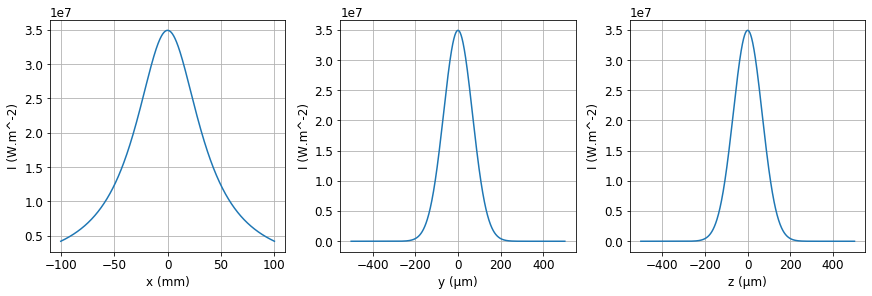

In [7]:
# initialize GaussianBeam
'''
NB: angles correspond to canonical spherical coordinates notations
    examples : (phi=0, theta=0)        = propagation along z
               (phi=0, theta=pi/2)     = propagation along x
               (phi=pi/2 , theta=pi/2) = propagation along y
    
'''
beam = GaussianBeam(
                    wavelength = 1550e-9,  # meters
                    power = 1,  # Watts
                    waist_value = 135e-6,  # meters
                    waist_position = (0, 0, 0),  # x, y, z
                    waist_shift = 0,  # to define a shift along the laser axis
                    phi = 0,  # angle of propagation in x/y plane
                    theta = pi / 2,  # angle of propagation, wrt z axis
                   )

# plot 1D cut
x = np.linspace(-100e-3, 100e-3, 1000)
y = np.linspace(-500e-6, 500e-6, 1000)
z = np.linspace(-500e-6, 500e-6, 1000)

fig, ax = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
ax[0].plot(x * 1e3, beam.intensity(x, 0, 0))
ax[0].set_xlabel('x (mm)')
ax[1].plot(y * 1e6, beam.intensity(0, y, 0))
ax[1].set_xlabel('y (µm)')
ax[2].plot(z * 1e6, beam.intensity(0, 0, z))
ax[2].set_xlabel('z (µm)')
for cax in ax:
    cax.grid()
    cax.set_ylabel('I (W.m^-2)')
plt.show()


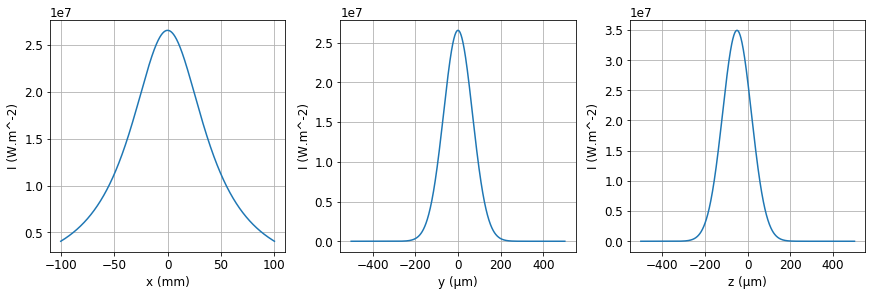

In [8]:
# play with parameters : waist position
beam.waist_position = (0, 0, -50e-6)

# plot
x = np.linspace(-100e-3, 100e-3, 1000)
y = np.linspace(-500e-6, 500e-6, 1000)
z = np.linspace(-500e-6, 500e-6, 1000)

fig, ax = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
ax[0].plot(x * 1e3, beam.intensity(x, 0, 0))
ax[0].set_xlabel('x (mm)')
ax[1].plot(y * 1e6, beam.intensity(0, y, 0))
ax[1].set_xlabel('y (µm)')
ax[2].plot(z * 1e6, beam.intensity(0, 0, z))
ax[2].set_xlabel('z (µm)')
for cax in ax:
    cax.grid()
    cax.set_ylabel('I (W.m^-2)')
plt.show()

### example :  2D cuts
[Back to top](#top)

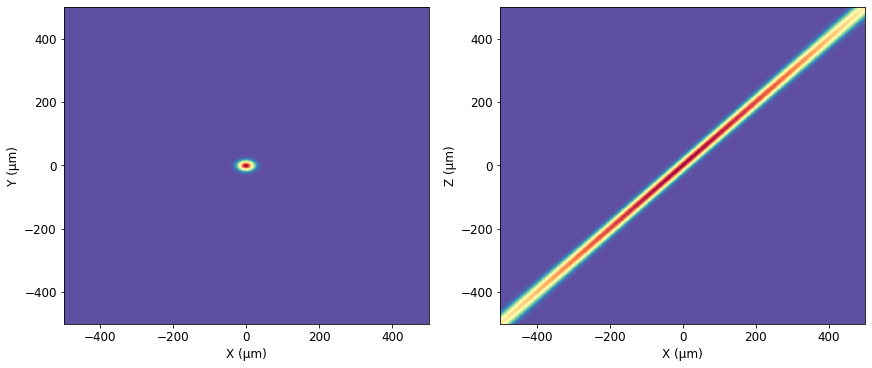

In [9]:
# -- settings
# initialize gauss beam
beam = GaussianBeam()

# change parameters
beam.waist_value = 20e-6
beam.phi = 0
beam.theta = pi / 4

# plot range
xrange = 0.5e-3
yrange = 0.5e-3
zrange = 0.5e-3

# -- grids and calculations
# 1D
x = np.linspace(-xrange, xrange, 1000)
y = np.linspace(-yrange, yrange, 1000)
z = np.linspace(-zrange, zrange, 1000)
# meshgrid XY
XYx, XYy = np.meshgrid(x, y)
# meshgrid XZ
XZx, XZz = np.meshgrid(x, z)
# intensities
XYi = beam.intensity(XYx, XYy, 0)
XZi = beam.intensity(XZx, 0, XZz)

# -- plot
fig, ax = plt.subplots(1, 2,
                       figsize=(12, 5),
                       constrained_layout=True)
cax = ax[0]
cax.pcolormesh(XYx * 1e6, XYy * 1e6, XYi, cmap='Spectral_r')
cax.set_xlabel('X (µm)')
cax.set_ylabel('Y (µm)')
cax = ax[1]
cax.pcolormesh(XZx * 1e6, XZz * 1e6, XZi, cmap='Spectral_r')
cax.set_xlabel('X (µm)')
cax.set_ylabel('Z (µm)')
plt.show()

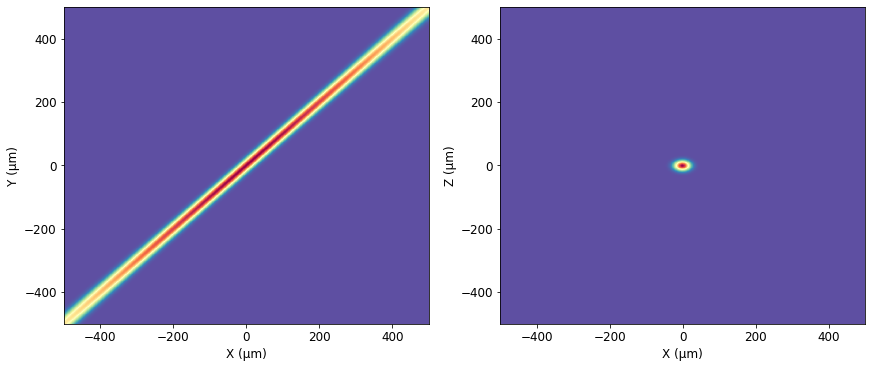

In [10]:
# -- settings
# initialize gauss beam
beam = GaussianBeam()

# change parameters
beam.waist_value = 20e-6
beam.phi = pi / 4
beam.theta = pi / 2

# plot range
xrange = 0.5e-3
yrange = 0.5e-3
zrange = 0.5e-3

# -- grids and calculations
# 1D
x = np.linspace(-xrange, xrange, 1000)
y = np.linspace(-yrange, yrange, 1000)
z = np.linspace(-zrange, zrange, 1000)
# meshgrid XY
XYx, XYy = np.meshgrid(x, y)
# meshgrid XZ
XZx, XZz = np.meshgrid(x, z)
# intensities
XYi = beam.intensity(XYx, XYy, 0)
XZi = beam.intensity(XZx, 0, XZz)

# -- plot
fig, ax = plt.subplots(1, 2,
                       figsize=(12, 5),
                       constrained_layout=True)
cax = ax[0]
cax.pcolormesh(XYx * 1e6, XYy * 1e6, XYi, cmap='Spectral_r')
cax.set_xlabel('X (µm)')
cax.set_ylabel('Y (µm)')
cax = ax[1]
cax.pcolormesh(XZx * 1e6, XZz * 1e6, XZi, cmap='Spectral_r')
cax.set_xlabel('X (µm)')
cax.set_ylabel('Z (µm)')
plt.show()

<a id='laser'></a>
## coil
[Back to top](#top)

The coil module implements the 3D magnetci field calculation for circular coils.

In [11]:
from odtcalc.coil import SingleCoil, CoilSet

### example : single coil, 1D cut
[Back to top](#top)

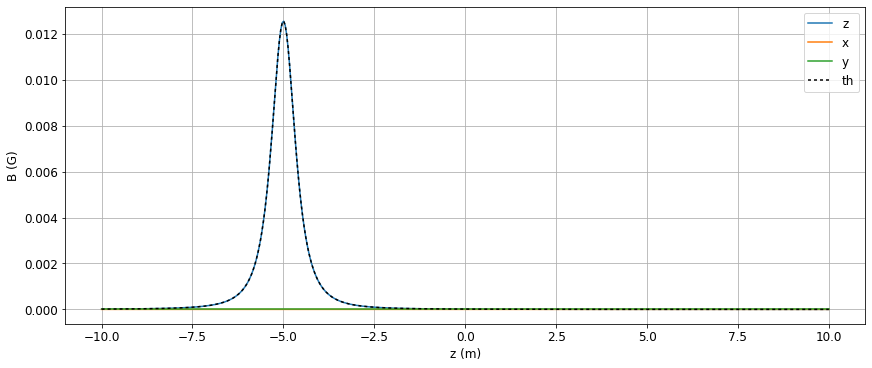

In [12]:
# initialize coil
'''
NB: we consider that the coil lies in a given canonical plane
    (XY, XZ or YZ). The coil is centered - for instance, for a coil
    located in the XY plane, its center is located at (x=0, y=0) -
    and can be shifted in the direction orthogonal to the plane
    - for a coil in the XY plane, the position of the coil along the
    Z axis can be set using the 'axial_shift' parameter
'''
radius = 0.5
z0 = -5
coil = SingleCoil(
                  plane='xy',
                  current=1, # amps
                  radius=radius,  # meters
                  axial_shift=z0, # meters
                  n_turns=1,
                 )


# field on axis
z = np.linspace(-10, 10, 500)
x = 0
y = 0
Bx, By, Bz = coil.field(x, y, z, unit='G')
Bth = csts.mu_0 * radius ** 2 / 2 / (radius**2 + (z-z0)**2) ** (3/2)
Bth *= 1e4  # Gauss

# plot
plt.figure(figsize=(12, 5), constrained_layout=True)
plt.plot(z, Bz, label='z')
plt.plot(z, Bx, label='x')
plt.plot(z, By, label='y')
plt.plot(z, Bth, dashes=[2, 2], color='k', label='th')
plt.grid()
plt.xlabel('z (m)')
plt.ylabel('B (G)')
plt.legend()
plt.show()


        

### example : single coil, 2D plot
[Back to top](#top)

|B|_max = 27.29 G
|Bx|_max = 16.60 G
|By|_max = 22.98 G
|Bz|_max = 0.00 G


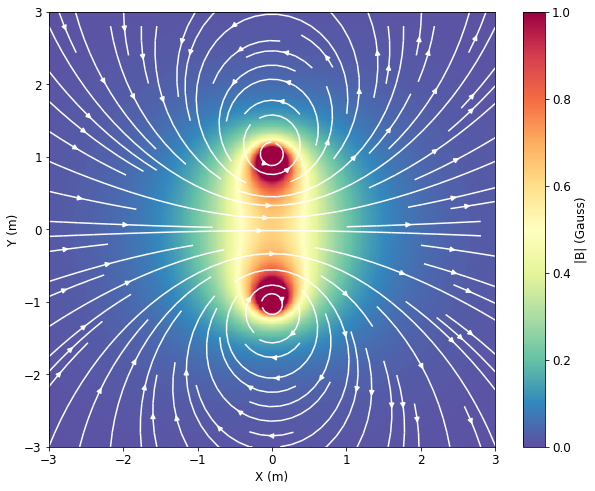

In [13]:
# -- settings
# parameters
radius = 1
axial_shift = 0
plane = 'yz'

# init coil
coil = SingleCoil(plane=plane,
                  current=1,
                  radius=radius,
                  axial_shift=axial_shift,
                  n_turns=100)

# -- compute
# grids
x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
x, y = np.meshgrid(x, y)
z = 0

# compute
Bx, By, Bz = coil.field(x, y, z, unit='G')
B = np.sqrt(Bx**2 + Bz**2 + By**2)

# print
print('|B|_max = %.2f G' % np.max(B))
for [ax, Bi] in zip(['x', 'y', 'z'], [Bx, By, Bz]):
    print('|B%s|_max = %.2f G' % (ax, np.max(Bi)))

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.streamplot(x, y, Bx, By, color='w')
pcm = ax.pcolormesh(x, y, np.sqrt(Bx**2 + Bz**2 + By**2), vmin=0, vmax=1, cmap='Spectral_r')
ax.set_ylabel('Y (m)')
ax.set_xlabel('X (m)')
plt.colorbar(pcm, ax=ax, label='|B| (Gauss)')
plt.show()

### example : set of coils, 2D plot
[Back to top](#top)
One can also use the CoilSet() object, to compute the magnetic field generated by a set of coils.

|B|_max = 90.13 G
|Bx|_max = 80.74 G
|By|_max = 0.00 G
|Bz|_max = 40.07 G


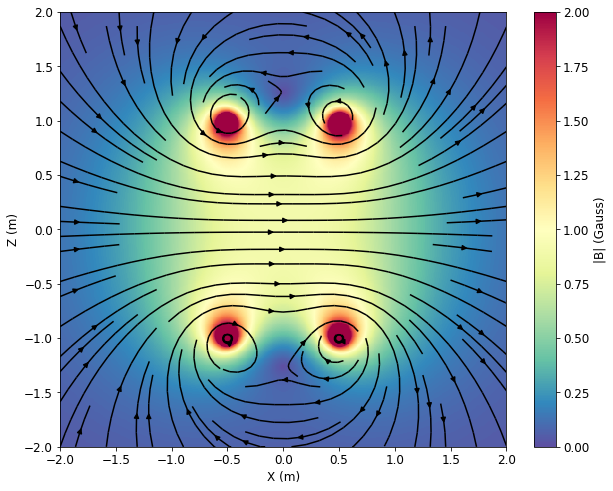

In [14]:
# === Helmholtz
# - settings
radius = 1
plane = 'yz'

# - define coils
coil1 = {'plane': plane,
         'current': 1,
         'radius': radius,
         'axial_shift': -0.5*radius,
         'n_turns': 100
         }

coil2 = {k: v for k, v in coil1.items()}
coil2['axial_shift'] = -coil2['axial_shift']

# - init CoilSet
# it takes a list of dictionnaries
# each dict cointains the settings for one coil
helm_coil = CoilSet([coil1, coil2], label='HC')

# - grids and computation
# grid
x = np.linspace(-2, 2, 500)
z = np.linspace(-2, 2, 500)
y = 0
x, z = np.meshgrid(x, z)

# compute
Bx, By, Bz = helm_coil.field(x, y, z, unit='G')
B = np.sqrt(Bx**2 + Bz**2 + By**2)

# print
print('|B|_max = %.2f G' % np.max(B))
for [ax, Bi] in zip(['x', 'y', 'z'], [Bx, By, Bz]):
    print('|B%s|_max = %.2f G' % (ax, np.max(Bi)))

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.streamplot(x, z, Bx, Bz, color='k')
pcm = ax.pcolormesh(x, z, np.sqrt(Bx**2 + Bz**2 + By**2), vmin=0, vmax=2, cmap='Spectral_r')
ax.set_ylabel('Z (m)')
ax.set_xlabel('X (m)')
plt.colorbar(pcm, ax=ax, label='|B| (Gauss)')
plt.show()

|B|_max = 89.86 G
|Bx|_max = 80.54 G
|By|_max = 0.00 G
|Bz|_max = 39.85 G


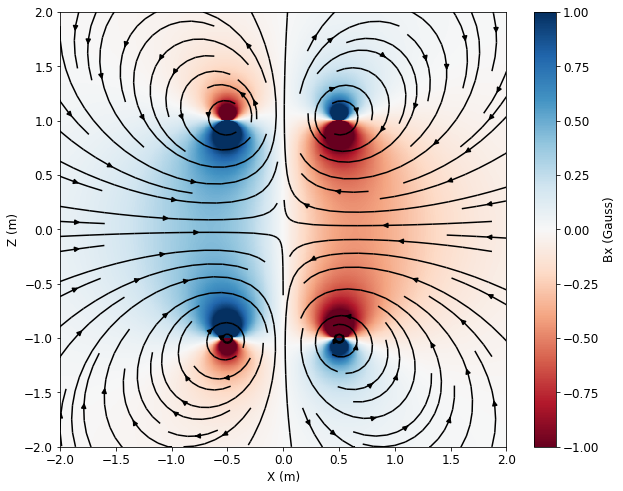

In [15]:
# === Anti Helmholtz
# - settings
radius = 1
plane = 'yz'

# - define coils
coil1 = {'plane': plane,
         'current': 1,
         'radius': radius,
         'axial_shift': -0.5*radius,
         'n_turns': 100
         }

coil2 = {k: v for k, v in coil1.items()}
coil2['axial_shift'] = -coil2['axial_shift']
coil2['current'] = -coil2['current']

# - init CoilSet
# it takes a list of dictionnaries
# each dict cointains the settings for one coil
helm_coil = CoilSet([coil1, coil2], label='HC')

# - grids and computation
# grid
x = np.linspace(-2, 2, 500)
z = np.linspace(-2, 2, 500)
y = 0
x, z = np.meshgrid(x, z)

# compute
Bx, By, Bz = helm_coil.field(x, y, z, unit='G')
B = np.sqrt(Bx**2 + Bz**2 + By**2)

# print
print('|B|_max = %.2f G' % np.max(B))
for [ax, Bi] in zip(['x', 'y', 'z'], [Bx, By, Bz]):
    print('|B%s|_max = %.2f G' % (ax, np.max(Bi)))

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.streamplot(x, z, Bx, Bz, color='k')
pcm = ax.pcolormesh(x, z, Bx, vmin=-1, vmax=1, cmap='RdBu')
ax.set_ylabel('Z (m)')
ax.set_xlabel('X (m)')
plt.colorbar(pcm, ax=ax, label='Bx (Gauss)')
plt.show()

<a id='laser'></a>
## trap
[Back to top](#top)

This is the main module from odtcalc. It allows to create a trap combining magnetic fields and lasers

In [16]:
from odtcalc.trap import Trap
from odtcalc.atom import Helium

### example : single laser beam
[Back to top](#top)

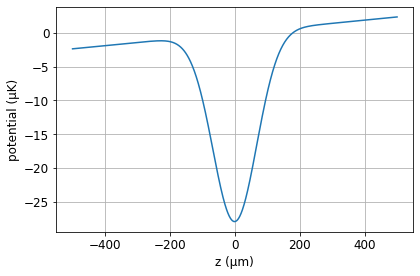

In [17]:
# -- setup trap
# init trap object
odt = Trap(atom=Helium())  # NB: atom is Helium by default

# trap general settings
odt.gravity = True  # enables gravity (True by default)
odt.magnetic_field_offset = (0, 0, 0)  # homogeneous magnetic field offset

# add one laser
# (same arguments as GaussianBeam() object)
odt.add_laser(
              wavelength = 1550e-9,  # meters
              power = 6,  # Watts
              waist_value = 135e-6,  # meters
              waist_position = (0, 0, 0),  # x, y, z
              waist_shift = 0,  # to define a shift along the laser axis
              phi = 0,  # angle of propagation in x/y plane
              theta = pi / 2,  # angle of propagation, wrt z axis
              label='Horizontal',
              )

# -- compute potential (basic function)
# compute
x = 0
y = 0
z = np.linspace(-500e-6, 500e-6, 1000)
U = odt.potential(x, y, z, unit='µK')

# plot
plt.figure()
plt.plot(z * 1e6, U)
plt.xlabel('z (µm)')
plt.ylabel('potential (µK)')
plt.grid()
plt.tight_layout()
plt.show()

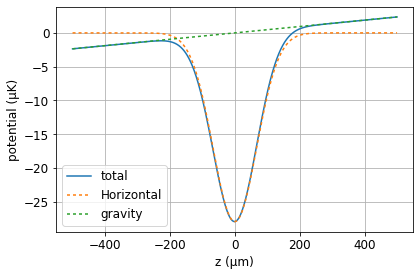

In [18]:
# -- compute potential (with all individual contributions)
# compute
x = 0
y = 0
z = np.linspace(-500e-6, 500e-6, 1000)
U, indiv = odt.potential(x, y, z, yield_each_contribution=True, unit='µK')

# plot
plt.figure()
plt.plot(z * 1e6, U, label='total')
for label, Ui in indiv.items():
    plt.plot(z * 1e6, Ui, dashes=[2, 2], label=label)
    
plt.xlabel('z (µm)')
plt.ylabel('potential (µK)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

Contours : 
[ 0.          5.58761137 11.17522274 16.7628341  22.35044547 27.93805684]


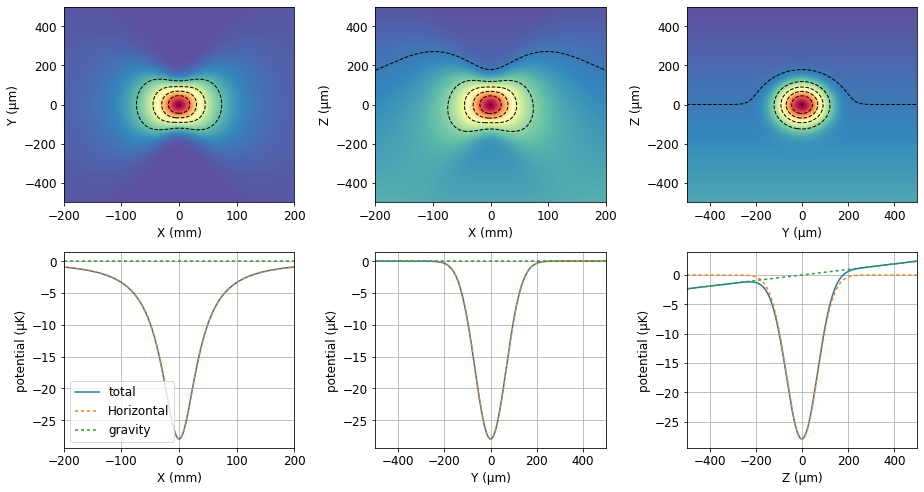

In [19]:
# -- plot potential
odt.plot_potential(spatial_range=(200e-3, 500e-6, 500e-6), 
                   figsize=(13,7),
                   unit='µK')

In [20]:
# -- compute expected properties
results = odt.compute_theoretical_properties()

>> Horizontal
 + depth = 27.9 µK
 + f_rad = 568 Hz
 + f_ax  = 1.47 Hz
------------------------------


>> XY
 + angle       = -48.5 arad
 + freq_u (~x) = 1.43 Hz
 + freq_v (~x) = 1.43 Hz
 + U0          = -27.9 µK
 + center x    = -41.4 am
 + center y    = 0.282 am
------------------------------
>> XZ
 + angle       = -48.6 arad
 + freq_u (~x) = 1.43 Hz
 + freq_v (~x) = 1.43 Hz
 + U0          = -27.9 µK
 + center x    = -37.3 am
 + center z    = -929 nm
------------------------------
>> YZ
 + angle       = -450 mrad
 + freq_u (~y) = 558 Hz
 + freq_v (~y) = 558 Hz
 + U0          = -27.9 µK
 + center y    = -1.24 am
 + center z    = -796 nm
------------------------------
>> mean
 + freq_x = 1.43 Hz
 + freq_y = 537 Hz
 + freq_z = 537 Hz
 + x0     = -39.3 am
 + y0     = -0.478 am
 + z0     = -862 nm
 + U0     = -27.9 µK
------------------------------


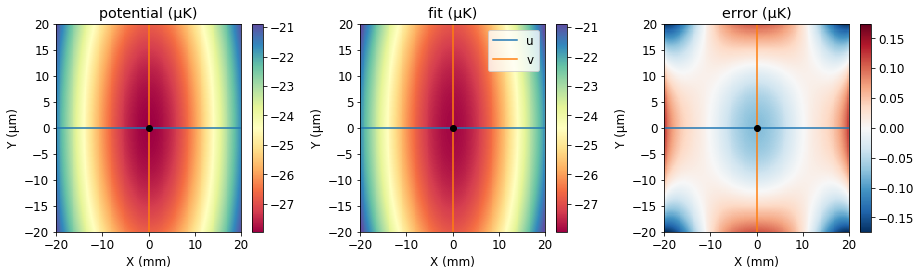

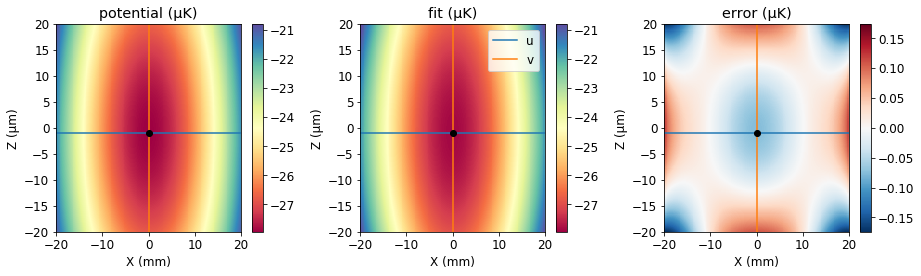

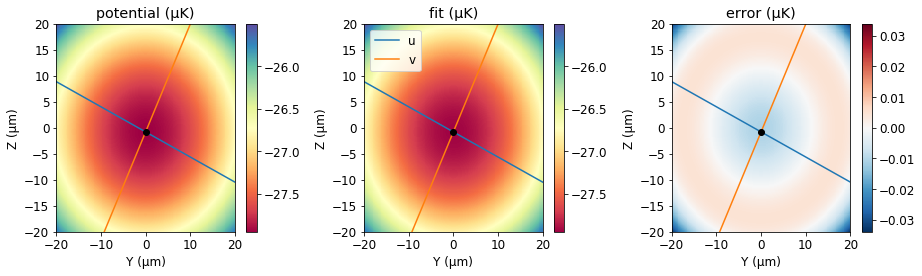

In [21]:
# -- fit to find frequency
results = odt.analyze_freq(spatial_range=(20e-3, 20e-6, 20e-6), 
                           plot_result=True,
                           figsize=(13,4),
                           only_print_mean=False)

>> XY
 + Umin  = -27.9 µK
 + Ulost = -920 mµK
 + depth = 27 µK
------------------------------
>> XZ
 + Umin  = -27.9 µK
 + Ulost = -1.17 µK
 + depth = 26.8 µK
------------------------------
>> YZ
 + Umin  = -27.9 µK
 + Ulost = -1.17 µK
 + depth = 26.8 µK
------------------------------


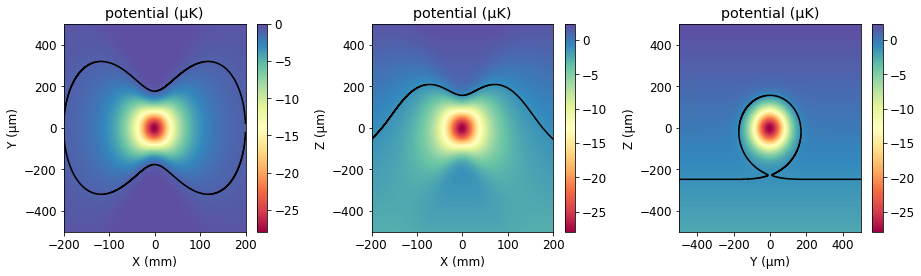

In [22]:
# -- find depth
result = odt.analyze_depth(spatial_range=(200e-3, 500e-6, 500e-6), figsize=(13,4))

### example : two laser beams
[Back to top](#top)

>> beam 1
 + depth = 27.9 µK
 + f_rad = 568 Hz
 + f_ax  = 1.47 Hz
------------------------------
>> beam 2
 + depth = 22.4 µK
 + f_rad = 508 Hz
 + f_ax  = 1.31 Hz
------------------------------
Contours : 
[ 0.         10.0587816  20.1175632  30.1763448  40.23512639 50.29390799]


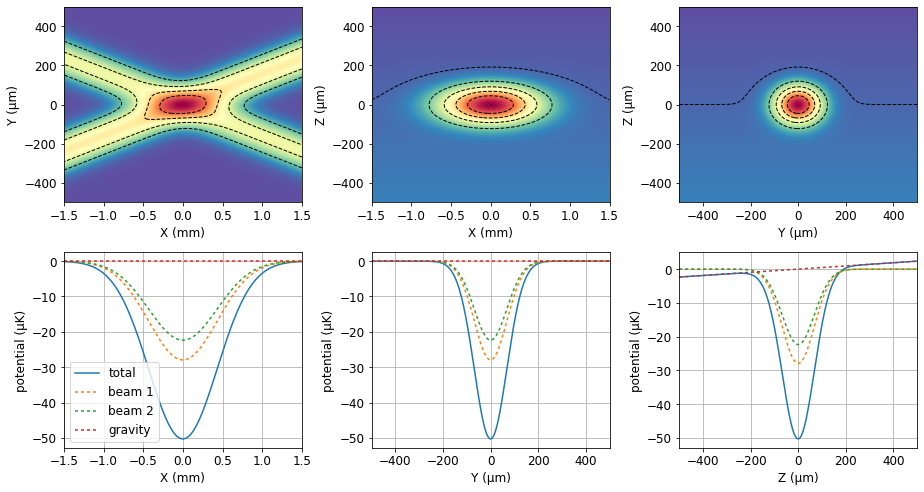

In [23]:
# -- settings
# parameters
power_in = 6
waist_value = 135e-6
half_angle = 9 * pi / 180  # radians
return_losses = 0.2

# beams
# NB : wavelength is 1550nm by default
beam1 = {'waist_value': waist_value,
         'power': power_in,
         'theta': pi / 2,  # i.e. in horizontal plane
         'phi': half_angle,
         'label': 'beam 1'}

beam2 = {'waist_value': waist_value,
         'power': power_in * (1 - return_losses),
         'theta': pi / 2,  # i.e. in horizontal plane
         'phi': -half_angle,
         'label': 'beam 2'}

# -- setup trap
odt = Trap()
odt.add_laser(**beam1)
odt.add_laser(**beam2)

# -- analyze
# expected properties
odt.compute_theoretical_properties()
# plot potential
odt.plot_potential(spatial_range=(1.5e-3, 500e-6, 500e-6), figsize=(13,7))

>> mean
 + freq_x = 116 Hz
 + freq_y = 741 Hz
 + freq_z = 751 Hz
 + x0     = 31.4 am
 + y0     = 0.915 am
 + z0     = -440 nm
 + U0     = -50.3 µK
------------------------------
>> XY
 + Umin  = -50.3 µK
 + Ulost = -27.9 µK
 + depth = 22.4 µK
------------------------------
>> XZ
 + Umin  = -50.3 µK
 + Ulost = -1.22 µK
 + depth = 49.1 µK
------------------------------
>> YZ
 + Umin  = -50.3 µK
 + Ulost = -1.22 µK
 + depth = 49.1 µK
------------------------------


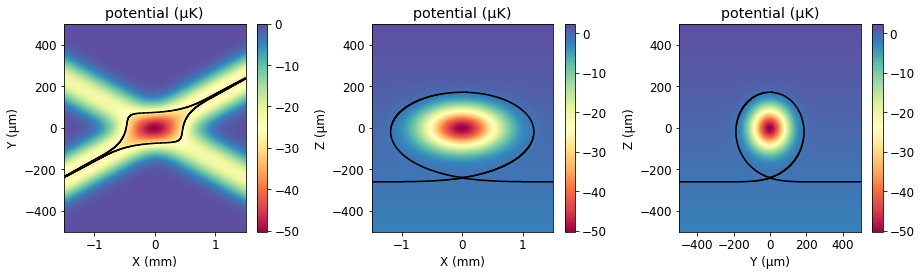

In [24]:
# compute frequency
freq_res = odt.analyze_freq(spatial_range=(60e-6, 20e-6, 20e-6), plot_result=False, only_print_mean=True)
# compute depth
depth_res = odt.analyze_depth(spatial_range=(1.5e-3, 500e-6, 500e-6), figsize=(13,4))

### example : two laser beams and coils
[Back to top](#top)

>> beam 1
 + depth = 27.9 µK
 + f_rad = 568 Hz
 + f_ax  = 1.47 Hz
------------------------------
>> beam 2
 + depth = 22.4 µK
 + f_rad = 508 Hz
 + f_ax  = 1.31 Hz
------------------------------
>> gradient coil
 + Bx0    = 9.97 G
 + By0    = 0 G
 + Bz0    = 0 G
 + grad_x = 972 mG/cm
------------------------------
>> comp coil
 + Bx0    = 740 mG
 + By0    = -1.05 µG
 + Bz0    = 0 G
------------------------------
>> REMINDER
 + 1G (1) = 2.8 MHz
 + 1G (2) = 134 µK
 + 1MHz   = 48 µK
------------------------------
Contours : 
[ 0.         14.01628709 28.03257418 42.04886127 56.06514836 70.08143545]


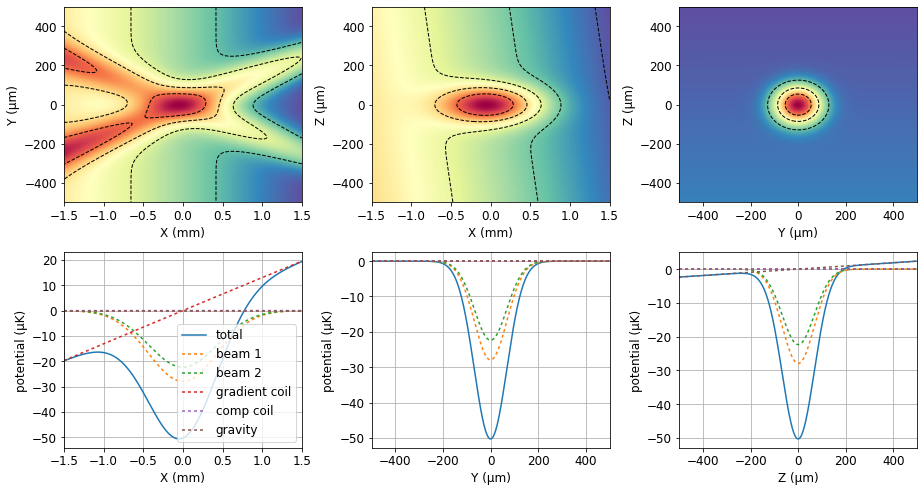

In [25]:
# -- settings
# laser parameters
power_in = 6
waist_value = 135e-6
half_angle = 9 * pi / 180  # radians
return_losses = 0.2

# gradient coil parameters
grad_coil_current = 5
grad_coil_radius = 15e-2
grad_coil_position = -12e-2
grad_coil_plane = 'yz'
grad_coil_turns = 100

# compensation
comp_coil_current = 2
comp_coil_radius = 12e-2
comp_coil_position = -12e-2
comp_coil_plane = 'yz'
comp_coil_turns = 10

# beams
# NB : wavelength is 1550nm by default
beam1 = {'waist_value': waist_value,
         'power': power_in,
         'theta': pi / 2,  # i.e. in horizontal plane
         'phi': half_angle,
         'label': 'beam 1'}

beam2 = {'waist_value': waist_value,
         'power': power_in * (1 - return_losses),
         'theta': pi / 2,  # i.e. in horizontal plane
         'phi': -half_angle,
         'label': 'beam 2'}

# gradient coil
grad_coil = {'plane': grad_coil_plane,
             'radius': grad_coil_radius,
             'axial_shift': grad_coil_position,
             'n_turns': grad_coil_turns,
             'current': grad_coil_current,
             'label': 'gradient coil'}

# compensation coils
comp_coil_1 = {'plane': comp_coil_plane,
              'radius': comp_coil_radius,
              'axial_shift': comp_coil_position,
              'n_turns': comp_coil_turns,
              'current': comp_coil_current}

# comp coil 2
comp_coil_2 = {k: v for k, v in comp_coil_1.items()}
comp_coil_2['axial_shift'] = -comp_coil_1['axial_shift']

# -- setup trap
odt = Trap()
odt.add_laser(**beam1)
odt.add_laser(**beam2)
odt.add_coil(**grad_coil)
odt.add_coil_set([comp_coil_1, comp_coil_2], label='comp coil')

# -- analyze
# expected properties
odt.compute_theoretical_properties()
# plot potential
odt.plot_potential(spatial_range=(1.5e-3, 500e-6, 500e-6), figsize=(13,7))

>> XY
 + Umin  = -50.3 µK
 + Ulost = -36.1 µK
 + depth = 14.2 µK
------------------------------
>> XZ
 + Umin  = -50.3 µK
 + Ulost = -16.4 µK
 + depth = 33.9 µK
------------------------------
>> YZ
 + Umin  = -50.3 µK
 + Ulost = -1.22 µK
 + depth = 49.1 µK
------------------------------


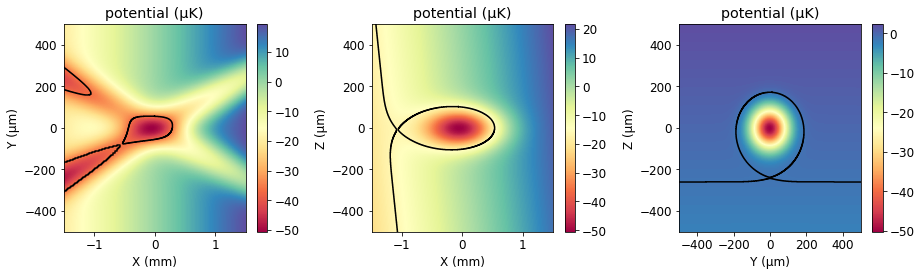

In [26]:
# compute depth
depth_res = odt.analyze_depth(spatial_range=(1.5e-3, 500e-6, 500e-6), figsize=(13,4))